In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.figure_factory._county_choropleth import create_choropleth



In [2]:
# load data
data = pd.read_csv("merged_train.csv")
data.head()



,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298,7810,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383,26929,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240,19249,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643,12180,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368,6870,0


In [3]:
# task 1 
# Partition dataset into training, validation sets using holdout method 75/25 split

# Xvariables has all the names except for State, County, FIPS, Party, Democratic, Republican
# Yvariables has Party, Democratic, Republican
Yvariables = ['Party','Democratic','Republican']
Xvariables = ['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Less than Bachelor\'s Degree','Percent Rural']
X_train, X_val, Y_train, Y_val = train_test_split(data[Xvariables], data[Yvariables], test_size = 0.25, random_state = 1)
X_train.head()



,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
943,15919,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
853,76,72.368421,0.000000,15.789474,11.842105,47.368421,11.842105,25.000000,56875,0.000000,25.373134,97.014925,100.000000
578,60878,95.579684,0.877164,1.404448,1.342028,50.962581,40.464536,16.324452,48619,6.093624,10.433639,78.108081,55.700005
1035,54562,95.484037,1.268282,1.414904,1.611011,50.500348,32.005792,20.301675,43835,6.425857,15.913833,75.223085,71.676143
822,54217,85.327480,0.673221,11.634727,3.225925,50.709187,32.939853,23.861519,58315,3.243313,11.760327,74.233050,32.845532


In [4]:
# task 2
# standardize the training and validation sets by using X_train as the scalar and applying to the training and validation sets
scaler = StandardScaler()
scaler.fit(X_train) # find the mean and standard diviation for the columns in X_train
x_train_scaled = scaler.transform(X_train) # scales X_train using the results from fit method
x_val_scaled = scaler.transform(X_val)  # scales X_val using the results from fit method
x_train_scaled



array([[-0.345068  ,  0.65924303, -0.04363108, ...,  0.33240678,
         0.56141981, -0.09521071],
       [-0.39488816, -0.34555147, -0.59845393, ...,  1.87960605,
         2.01297272,  1.36549077],
       [-0.20368919,  0.84607517, -0.50500024, ..., -0.47046883,
        -0.04999222,  0.00623229],
       ...,
       [-0.30811876,  0.79654542, -0.54416126, ..., -1.11037852,
        -1.07924513,  0.41391348],
       [ 0.2187051 , -0.47707575,  1.33755335, ..., -0.29816431,
         0.07718104, -0.74801204],
       [-0.38811151,  0.67491051, -0.59845393, ..., -1.54891473,
        -0.30144791,  1.36549077]])

In [5]:
# task 3
# predict democratic votes using 2 predictors
model = linear_model.LinearRegression()
fitted_model = model.fit(X=X_train[['Percent Foreign Born', 'Median Household Income']],y=Y_train['Democratic'])
predicted = fitted_model.predict(X_train[['Percent Foreign Born','Median Household Income']])
print (predicted)

# Evaluate linear regression model using 2 predictors on democratic votes
X_train_dummy = pd.get_dummies(X_train, drop_first = True)
X_val_dummy = pd.get_dummies(X_val, drop_first = True)
model = linear_model.LinearRegression().fit(X = X_train_dummy[['Percent Foreign Born', 'Median Household Income']], y = Y_train['Democratic'])
score_val = model.score(X = X_val_dummy[['Percent Foreign Born', 'Median Household Income']], y = Y_val['Democratic']) # R squared (validation)
print(score_val)

# Evaluate LASSO regression model on democratic votes
model = linear_model.Lasso(alpha = 1).fit(X = X_train_dummy, y = Y_train['Democratic'])
score_val = model.score(X = X_val_dummy, y = Y_val['Democratic']) # R squared (validation)
print(score_val)

# predict republican votes using 2 predictors
model = linear_model.LinearRegression()
fitted_model = model.fit(X=X_train[['Percent Foreign Born', 'Median Household Income']],y=Y_train['Republican'])
predicted = fitted_model.predict(X_train[['Percent Foreign Born', 'Median Household Income']])
print (predicted)

# Evaluate linear regression model using 2 predictors on republican votes
X_train_dummy = pd.get_dummies(X_train, drop_first = True)
X_val_dummy = pd.get_dummies(X_val, drop_first = True)
model = linear_model.LinearRegression().fit(X = X_train_dummy[['Percent Foreign Born', 'Median Household Income']], y = Y_train['Republican'])
score_val = model.score(X = X_val_dummy[['Percent Foreign Born', 'Median Household Income']], y = Y_val['Republican']) # R squared (validation)
print(score_val)

# Evaluate LASSO regression model on republican votes
model = linear_model.Lasso(alpha = 1).fit(X = X_train_dummy, y = Y_train['Republican'])
score_val = model.score(X = X_val_dummy, y = Y_val['Republican']) # R squared (validation)
print(score_val)

# it seems like lasso regression is better



3.72068400e+04  8.61624963e+04
  2.37961719e+04  4.07494076e+04  5.24170017e+04  1.98101753e+03
  9.67611551e+03  7.54159849e+04 -1.07361334e+04  1.87620199e+04
 -1.17913140e+03  4.03431306e+04 -1.67382464e+04  1.94060616e+04
  2.10040997e+04  3.39952807e+03 -9.40878819e+03  3.42981492e+03
  1.29531116e+05  2.27299229e+04  1.00180979e+05 -7.07742429e+03
  4.44174615e+04  3.35709594e+04  2.42793124e+04 -2.21831921e+02
  8.43319098e+04 -6.61965603e+03  5.84971015e+03  4.75080667e+04
 -1.59663233e+04 -1.16239532e+04  6.68000275e+04  9.43137628e+03
  5.74069106e+03  1.29007447e+02 -2.96776657e+01  3.33238572e+04
 -8.87124233e+02 -2.54804421e+03  8.57948574e+04  5.25872096e+04
 -1.07580799e+04  1.37478627e+04  1.41494003e+04  1.73115979e+04
  8.38438700e+03  9.74213006e+02  5.93271030e+04  1.48138247e+04
  7.62300767e+04 -1.03647711e+04  6.22611145e+04  3.23674745e+04
  2.93255515e+04  3.63127080e+03  3.07351028e+04  1.34140860e+04
  1.52433816e+04  1.18300063e+05  6.71481338e+04  5.1157425

In [6]:
# task 4
# Partitioning the data into training and validation using only variables that are stronger predictors
X = ['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree', 'Percent Rural']
Y = ['Party']
X_train_class, X_val_class, Y_train_class, Y_val_class = train_test_split(data[X], data[Y], test_size=0.25, random_state=0)
scaler.fit(X_train_class)
x_train_scaled_class = scaler.transform(X_train_class)
x_val_scaled_class = scaler.transform(X_val_class)



In [7]:
# task 4 - continuation
# Build a classification model to classify each county as Democratic or Republican
# kNN classifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform')  
classifier.fit(x_train_scaled_class, Y_train_class.values.ravel())



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
y_pred_class = classifier.predict(x_val_scaled_class)



In [9]:
conf_matrix = metrics.confusion_matrix(Y_val_class, y_pred_class)
print(conf_matrix)



[[208  14]
 [ 37  40]]


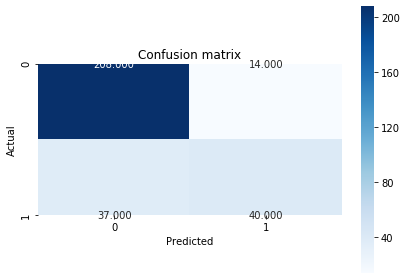

In [10]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()



In [11]:
accuracy = metrics.accuracy_score(Y_val_class, y_pred_class)
error = 1 - accuracy
precision = metrics.precision_score(Y_val_class, y_pred_class, average=None)
recall = metrics.recall_score(Y_val_class, y_pred_class, average=None)
F1_score = metrics.f1_score(Y_val_class, y_pred_class, average=None)
print("Results of kNN classifier\n")
print("Accuracy: " + str(accuracy) + "\n" + "Error: " + str(error) + "\n" + "Precision: " + str(precision) + "\n" + "Recall: " + str(recall) + "\n" + "F1 score: " + str(F1_score))



Results of kNN classifier

Accuracy: 0.8294314381270903
Error: 0.1705685618729097
Precision: [0.84897959 0.74074074]
Recall: [0.93693694 0.51948052]
F1 score: [0.89079229 0.61068702]


In [12]:
# task 4 - continuation
# SVM Classifier
classifier = SVC(kernel='rbf')
classifier.fit(x_train_scaled_class, Y_train_class.values.ravel())

svm_class = classifier



In [13]:
y_pred_class = classifier.predict(x_val_scaled_class)


In [14]:
conf_matrix = metrics.confusion_matrix(Y_val_class, best_y_pred_class)
print(conf_matrix)



NameError: name 'best_y_pred_class' is not defined

In [0]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()



In [0]:
accuracy = metrics.accuracy_score(Y_val_class, y_pred_class)
error = 1 - accuracy
precision = metrics.precision_score(Y_val_class, y_pred_class, average=None)
recall = metrics.recall_score(Y_val_class, y_pred_class, average=None)
F1_score = metrics.f1_score(Y_val_class, y_pred_class, average=None)
print("Results of SVM classifier\n")
print("Accuracy: " + str(accuracy) + "\n" + "Error: " + str(error) + "\n" + "Precision: " + str(precision) + "\n" + "Recall: " + str(recall) + "\n" + "F1 score: " + str(F1_score))



In [0]:
# task 4
# Decision trees
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(x_train_scaled_class, Y_train_class.values.ravel())



In [0]:
# Number of nodes in the decision tree
print("Number of nodes in the decision tree: " + str(len(classifier.tree_.__getstate__()['nodes'])))



In [0]:
y_pred_class = classifier.predict(x_val_scaled_class)



In [0]:
conf_matrix = metrics.confusion_matrix(Y_val_class, y_pred_class)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()



In [0]:
accuracy = metrics.accuracy_score(Y_val_class, y_pred_class)
error = 1 - accuracy
precision = metrics.precision_score(Y_val_class, y_pred_class, average=None)
recall = metrics.recall_score(Y_val_class, y_pred_class, average=None)
F1_score = metrics.f1_score(Y_val_class, y_pred_class, average=None)
print("Results of Decision trees classifier\n")
print("Accuracy: " + str(accuracy) + "\n" + "Error: " + str(error) + "\n" + "Precision: " + str(precision) + "\n" + "Recall: " + str(recall) + "\n" + "F1 score: " + str(F1_score))



In [0]:
# task 4
# Naives Bayes Classifier
classifier = GaussianNB()  
classifier.fit(x_train_scaled_class, Y_train_class.values.ravel())



In [0]:
y_pred_class = classifier.predict(x_val_scaled_class)



In [0]:
conf_matrix = metrics.confusion_matrix(Y_val_class, y_pred_class)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()



In [0]:
accuracy = metrics.accuracy_score(Y_val_class, y_pred_class)
error = 1 - accuracy
precision = metrics.precision_score(Y_val_class, y_pred_class, average=None)
recall = metrics.recall_score(Y_val_class, y_pred_class, average=None)
F1_score = metrics.f1_score(Y_val_class, y_pred_class, average=None)
print("Results of Naive Bayes classifier\n")
print("Accuracy: " + str(accuracy) + "\n" + "Error: " + str(error) + "\n" + "Precision: " + str(precision) + "\n" + "Recall: " + str(recall) + "\n" + "F1 score: " + str(F1_score))



In [0]:
# SVM Classifier has the highest accuracy among all the 4 classification methods for the selected predictors.



In [0]:
# Task 5 Start Kmeans 2 clusters all vars



In [0]:
X = ['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Less than Bachelor\'s Degree','Percent Rural']
Y = ['Party']

train_class = data[X]
lables = data[Y].to_numpy().reshape(-1)

scaler = StandardScaler()
scaler.fit(train_class)
train_scaled_class = scaler.transform(train_class)

clustering = KMeans(n_clusters=2, init='random', random_state=0).fit(train_scaled_class)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(lables, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(lables, clusters)
silhouette_coefficient = np.average(metrics.silhouette_samples(train_scaled_class, clusters, metric='euclidean'))
print([adjusted_rand_index, silhouette_coefficient])


In [0]:
# DB Scan eps = 2 min_samples = 5 
clustering = DBSCAN(eps=2,min_samples=5,metric='euclidean').fit(train_scaled_class)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(lables, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(lables, clusters)
silhouette_coefficient = np.average(metrics.silhouette_samples(train_scaled_class, clusters, metric='euclidean'))
print([adjusted_rand_index, silhouette_coefficient])




In [0]:
# Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born'
# Kmeans init = 'k-means++' n init = 15
X = ['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born']
Y = ['Party']


train_class = data[X]
lables = data[Y].to_numpy().reshape(-1)

scaler = StandardScaler()
scaler.fit(train_class)
train_scaled_class = scaler.transform(train_class)

clustering = KMeans(n_clusters=2, n_init= 15, init='k-means++', random_state=0).fit(train_scaled_class)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(lables, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(lables, clusters)
silhouette_coefficient = np.average(metrics.silhouette_samples(train_scaled_class, clusters, metric='euclidean'))
print([adjusted_rand_index, silhouette_coefficient])


In [0]:
# DB Scan eps = 2 min samples = 8
clustering = DBSCAN(eps=2,min_samples=8,metric='euclidean').fit(train_scaled_class)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(lables, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(lables, clusters)
silhouette_coefficient = np.average(metrics.silhouette_samples(train_scaled_class, clusters, metric='euclidean'))
print([adjusted_rand_index, silhouette_coefficient])


In [0]:
# 'Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Less than Bachelor\'s Degree','Percent Rural'
# Kmeans init = 'k-means++' n init = 15
X = ['Total Population', 'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born','Percent Female','Percent Age 29 and Under','Percent Age 65 and Older','Median Household Income','Percent Unemployed','Percent Less than High School Degree','Percent Less than Bachelor\'s Degree','Percent Rural']

train_class = data[X]
lables = data[Y].to_numpy().reshape(-1)

scaler = StandardScaler()
scaler.fit(train_class)
train_scaled_class = scaler.transform(train_class)

clustering = KMeans(n_clusters=2, n_init= 15, init='k-means++', random_state=0).fit(train_scaled_class)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(lables, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(lables, clusters)
silhouette_coefficient = np.average(metrics.silhouette_samples(train_scaled_class, clusters, metric='euclidean'))
print([adjusted_rand_index, silhouette_coefficient])


In [0]:
# DB Scan eps =2 min samples =8
clustering = DBSCAN(eps=2,min_samples=8,metric='euclidean').fit(train_scaled_class)
clusters = clustering.labels_

cont_matrix = metrics.cluster.contingency_matrix(lables, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

adjusted_rand_index = metrics.adjusted_rand_score(lables, clusters)
silhouette_coefficient = np.average(metrics.silhouette_samples(train_scaled_class, clusters, metric='euclidean'))
print([adjusted_rand_index, silhouette_coefficient])



In [0]:
# task 6
X = ['Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 'Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree', 'Percent Rural']

_data = data[X]
_fips = data[['FIPS']]

scaler = StandardScaler()
scaler.fit(_data)
scaled_data = scaler.transform(_data)

party = svm_class.predict(scaled_data).tolist()
fips = _fips.values

colorscale = ["#ff0000","#0015bc"]
fig = create_choropleth(fips=fips, values=party, colorscale=colorscale, county_outline={'color': 'rgb(105,105,105)', 'width': 0.25}, state_outline={'color': 'rgb(192,192,192)','width': 1})
fig.layout.template = None
fig.show()
